In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df=pd.read_csv('data.csv')

In [54]:
df.head()

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
0,Afghanistan,2016,677,5,0.7,Eastern Mediterranean
1,Afghanistan,2015,58064,8,0.01,Eastern Mediterranean
2,Afghanistan,2014,45481,4,0.0,Eastern Mediterranean
3,Afghanistan,2013,3957,14,0.35,Eastern Mediterranean
4,Afghanistan,2012,12,0,0.1,Eastern Mediterranean


In [55]:
df.dtypes

Country                                   object
Year                                       int64
Number of reported cases of cholera       object
Number of reported deaths from cholera    object
Cholera case fatality rate                object
WHO Region                                object
dtype: object

In [56]:
df = df.rename(columns={
    'Number of reported cases of cholera':'Cases',
    'Number of reported deaths from cholera':'Deaths',
    'Cholera case fatality rate':'Death rate',
    'WHO Region':'Region'
})

In [57]:
df[df['Cases'].str.contains('[^0-9\.]').astype(bool) & df['Cases'].notnull()]

,Country,Year,Cases,Deaths,Death rate,Region
81,Australia,2011,6,0,0.00,Western Pacific
121,Bahamas,2011,1,NaN,NaN,Americas
246,Brazil,2011,1,0,0.00,Americas
260,Brunei Darussalam,2011,3,NaN,0.00,Western Pacific
412,Canada,2011,9,NaN,0.00,Americas
459,Chile,2011,1,0,0.00,Americas
472,China,2011,26,NaN,0.00,Western Pacific
645,Dominican Republic,2011,20851,336,1.61,Americas
714,France,2011,1,0,0.00,Europe
763,Germany,2011,4,0,0.00,Europe


In [58]:
df[df['Deaths'].str.contains('[^0-9\.]').astype(bool) & df['Deaths'].notnull()]

,Country,Year,Cases,Deaths,Death rate,Region
761,Germany,2016,1,Unknown,Unknown,Europe
1059,Iraq,2016,3 5,0 0,0.0 0.0,Eastern Mediterranean


In [59]:
df[df['Death rate'].str.contains('[^0-9\.]').astype(bool) & df['Death rate'].notnull()]

,Country,Year,Cases,Deaths,Death rate,Region
761,Germany,2016,1,Unknown,Unknown,Europe
1059,Iraq,2016,3 5,0 0,0.0 0.0,Eastern Mediterranean


In [60]:
df.loc[1059, 'Cases'] = '5'
df.loc[1059, 'Deaths'] = '0'
df.loc[1059, 'Death rate'] = '0.0'

In [61]:
for column in ['Cases', 'Deaths', 'Death rate']:
    df[column] = df[column].replace('Unknown', np.nan).str.replace(' ', '')
    df[column] = pd.to_numeric(df[column])

In [62]:
df.isnull().sum()

Country         0
Year            0
Cases          22
Deaths        118
Death rate    128
Region          0
dtype: int64

In [63]:
df[df.isnull().any(1)]

,Country,Year,Cases,Deaths,Death rate,Region
11,Afghanistan,2002,3.0,NaN,NaN,Eastern Mediterranean
68,Angola,1971,1.0,NaN,NaN,Africa
77,Australia,2015,2.0,NaN,NaN,Western Pacific
87,Australia,2002,5.0,NaN,NaN,Western Pacific
88,Australia,2001,2.0,NaN,NaN,Western Pacific
...,...,...,...,...,...,...
2487,Russian Federation,1980,NaN,0.0,NaN,Europe
2488,Russian Federation,1971,NaN,0.0,NaN,Europe
2489,Sweden,1984,NaN,0.0,NaN,Europe
2490,Switzerland,1980,NaN,0.0,NaN,Europe


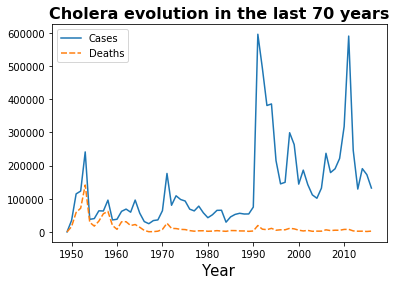

In [64]:
global_year = df.groupby('Year').sum().loc[:, ['Cases', 'Deaths']]

ax = sns.lineplot(data=global_year)
plt.xlabel('Year', fontsize=15)
plt.title('Cholera evolution in the last 70 years', fontsize=16, fontweight='bold')
plt.show()

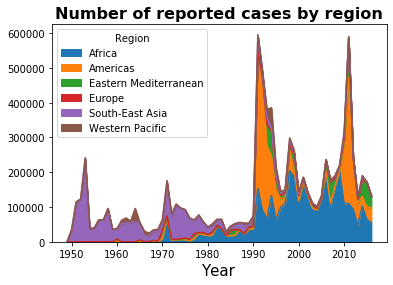

In [65]:
region_year = df.groupby(['Year', 'Region']).sum()['Cases'].reset_index()
region_year = region_year.pivot(index = 'Year', columns = 'Region', values = 'Cases').fillna(0.0)

region_year.plot.area()
plt.title('Number of reported cases by region', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=15)
plt.show()

In [66]:
codes = pd.read_csv('data.csv', names=['Code', 'Country']).set_index('Country')

country_year = df.groupby(['Year', 'Country']).sum()['Cases'].reset_index()
country_year = country_year.join(codes, how='left', on='Country')

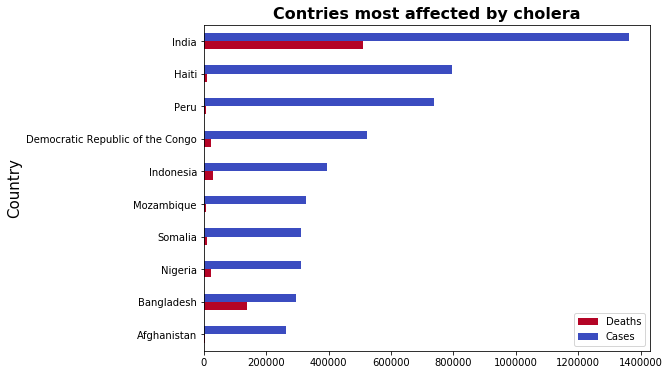

In [67]:
country_agg = df.groupby('Country').sum().loc[:, ['Cases', 'Deaths']]
country_agg['Death rate'] = country_agg['Deaths'] * 100 / country_agg['Cases']
country_agg = country_agg.sort_values('Cases', ascending=False).head(10)

country_agg.loc[:, ['Deaths', 'Cases']].iloc[::-1].plot(kind='barh', figsize=(8,6), rot=0, colormap='coolwarm_r')
plt.title('Contries most affected by cholera', fontsize=16, fontweight='bold')
plt.ylabel('Country', fontsize=15)
plt.show()

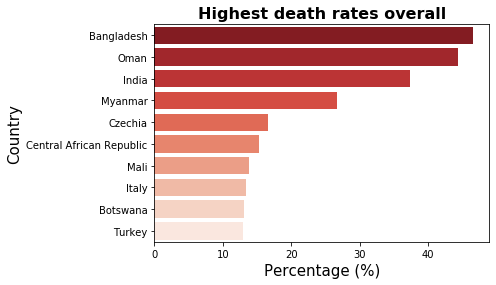

In [68]:
country_agg = df.groupby('Country').sum().loc[:, ['Cases', 'Deaths']]
country_agg['Death rate'] = country_agg['Deaths'] * 100 / country_agg['Cases']
country_agg = country_agg.sort_values('Death rate', ascending=False).head(10)

sns.barplot(country_agg['Death rate'].values, country_agg.index, palette='Reds_r')
plt.title('Highest death rates overall', fontsize=16, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=15)
plt.ylabel('Country', fontsize=15)
plt.show()

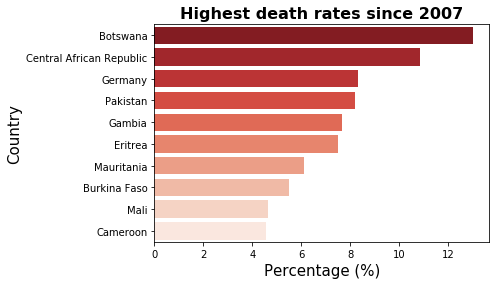

In [69]:
last_decade = df.loc[df['Year'] >= 2007, :]
country_agg = last_decade.groupby('Country').sum().loc[:, ['Cases', 'Deaths']]
country_agg['Death rate'] = country_agg['Deaths'] * 100 / country_agg['Cases']
country_agg = country_agg.sort_values('Death rate', ascending=False).head(10)

sns.barplot(country_agg['Death rate'].values, country_agg.index, palette='Reds_r')
plt.title('Highest death rates since 2007', fontsize=16, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=15)
plt.ylabel('Country', fontsize=15)
plt.show()

In [71]:
dataset = pd.read_csv('data.csv')

In [72]:
dataset.head()

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
0,Afghanistan,2016,677,5,0.7,Eastern Mediterranean
1,Afghanistan,2015,58064,8,0.01,Eastern Mediterranean
2,Afghanistan,2014,45481,4,0.0,Eastern Mediterranean
3,Afghanistan,2013,3957,14,0.35,Eastern Mediterranean
4,Afghanistan,2012,12,0,0.1,Eastern Mediterranean


In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 2492 non-null   object
 1   Year                                    2492 non-null   int64 
 2   Number of reported cases of cholera     2470 non-null   object
 3   Number of reported deaths from cholera  2375 non-null   object
 4   Cholera case fatality rate              2365 non-null   object
 5   WHO Region                              2492 non-null   object
dtypes: int64(1), object(5)
memory usage: 116.9+ KB


In [74]:
dataset.shape

(2492, 6)

In [75]:
dataset.isnull().sum()

Country                                     0
Year                                        0
Number of reported cases of cholera        22
Number of reported deaths from cholera    117
Cholera case fatality rate                127
WHO Region                                  0
dtype: int64

In [76]:
dataset.replace(np.nan, "0", regex=True, inplace=True)

In [77]:
dataset["Number of reported cases of cholera"] = dataset["Number of reported cases of cholera"].str.replace(" ", "")
dataset["Number of reported deaths from cholera"] = dataset["Number of reported deaths from cholera"].str.replace("Unknown", "0")
dataset["Number of reported deaths from cholera"] = dataset["Number of reported deaths from cholera"].str.replace("0 0", "0")
dataset["Cholera case fatality rate"] = dataset["Cholera case fatality rate"].str.replace("0.0 0.0", "0")
dataset["Cholera case fatality rate"] = dataset["Cholera case fatality rate"].str.replace("Unknown", "0")

In [78]:
def convert_int(pass_the_column_name, intORfloat):
    dataset[pass_the_column_name] = dataset[pass_the_column_name].astype(intORfloat)

In [79]:
convert_int("Number of reported cases of cholera", int)
convert_int("Year", int)
convert_int("Number of reported deaths from cholera", int)
convert_int("Cholera case fatality rate", float)

In [82]:
dataset["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Cuba', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia',
       'I

In [83]:
dataset.describe()

,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate
count,2492.000000,2492.000000,2492.000000,2492.000000
mean,1992.343098,3684.074238,360.033708,5.459960
std,14.834151,14840.194850,3484.892806,15.211705
min,1949.000000,0.000000,0.000000,0.000000
25%,1981.000000,9.000000,0.000000,0.000000
50%,1994.000000,228.500000,5.000000,1.300000
75%,2004.000000,1847.750000,53.250000,4.912500
max,2016.000000,340311.000000,124227.000000,450.000000


In [84]:
def countryVSreportedCase(country_name):
    country = dataset[dataset["Country"] == country_name][["Year", "Number of reported cases of cholera", "Cholera case fatality rate"]]
    sns.set_style("whitegrid")
    plt.subplots(figsize=(15,6))
    plt.plot(country["Year"], country["Number of reported cases of cholera"], linewidth=3)
    plt.xlabel("Year")
    plt.ylabel("Number of reported cases of cholera")
    plt.title(f"For {country_name}")

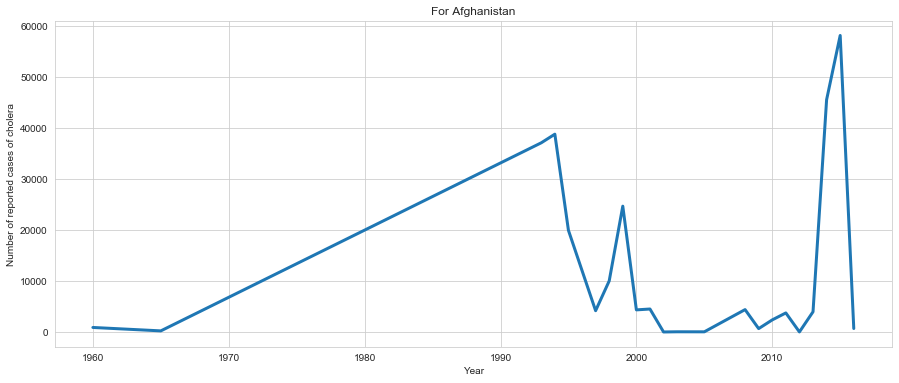

In [85]:
countryVSreportedCase("Afghanistan")

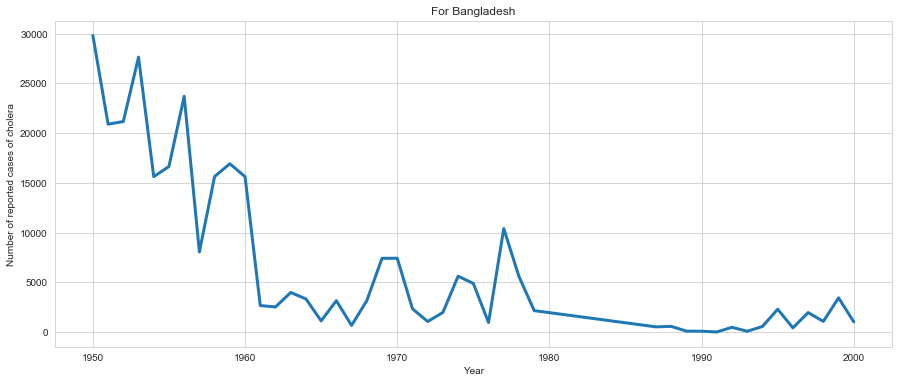

In [86]:
countryVSreportedCase("Bangladesh")

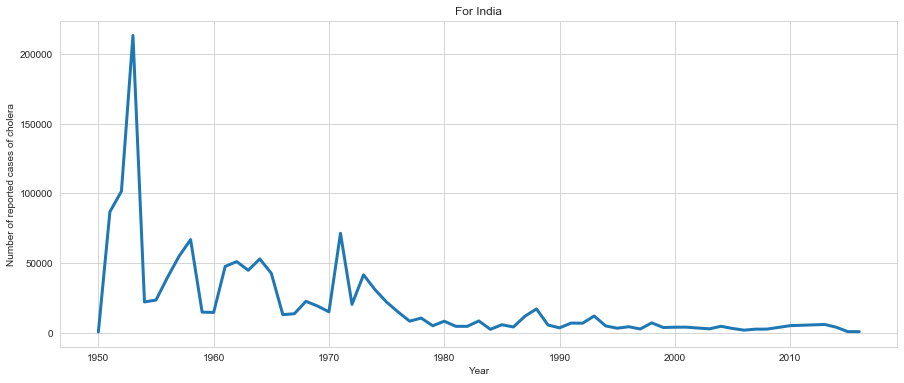

In [87]:
countryVSreportedCase("India")

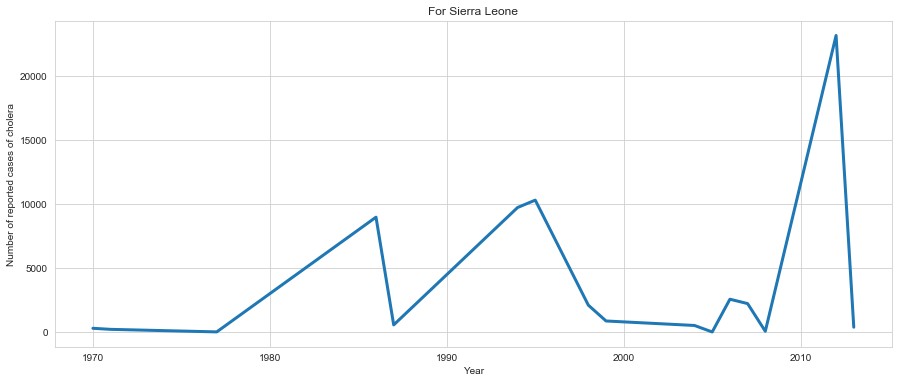

In [88]:
countryVSreportedCase("Sierra Leone")

In [89]:
dataset["WHO Region"].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [90]:
EM = dataset[dataset["WHO Region"] == "Eastern Mediterranean"]
AF = dataset[dataset["WHO Region"] == "Africa"]
EU = dataset[dataset["WHO Region"] == "Europe"]
AM = dataset[dataset["WHO Region"] == "Americas"]
WP = dataset[dataset["WHO Region"] == "Western Pacific"]
SEA = dataset[dataset["WHO Region"] == "South-East Asia"]

In [93]:
death = dataset.groupby(["Country", "WHO Region"])["Number of reported deaths from cholera"].sum().reset_index()
death = pd.DataFrame(death)

In [94]:
death.head()

,Country,WHO Region,Number of reported deaths from cholera
0,Afghanistan,Eastern Mediterranean,2641
1,Albania,Europe,25
2,Algeria,Africa,650
3,Andorra,Europe,0
4,Angola,Africa,9920


In [95]:
death["Country"].nunique()

162

In [96]:
eastern_maditer = death.loc[(death["WHO Region"]=="Eastern Mediterranean")]
africa = death.loc[(death["WHO Region"]=="Africa")]
europe = death.loc[(death["WHO Region"]=="Europe")]
western = death.loc[(death["WHO Region"]=="Western Pacific")]
south_east_asia = death.loc[(death["WHO Region"]=="South-East Asia")]

def deathrate(region):
    global eastern_maditer, africa, europe, western, south_east_asia
    r = region["WHO Region"].unique()
    plt.subplots(figsize=(16,6))
    plt.xticks(rotation=90)
    sns.barplot(x=region["Country"], y=region["Number of reported deaths from cholera"], data=region)
    plt.title(f"WHO Region for: {r}")

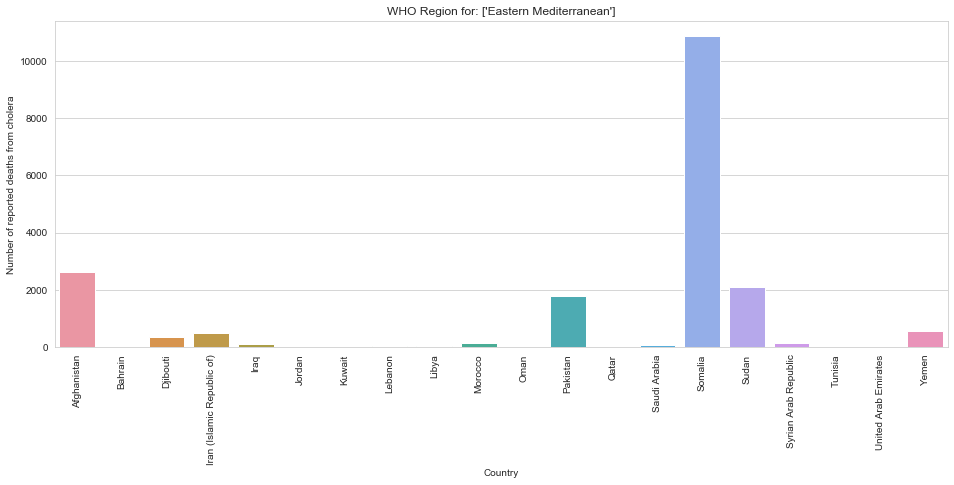

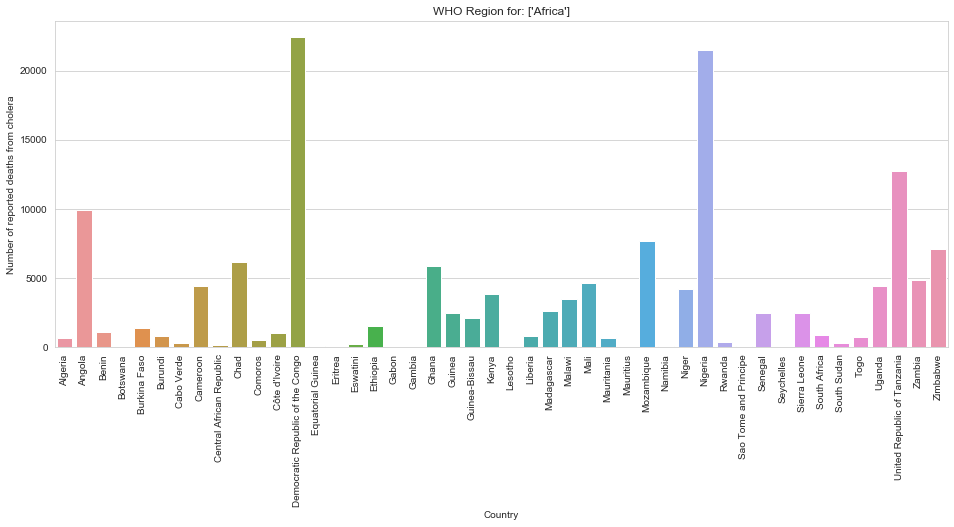

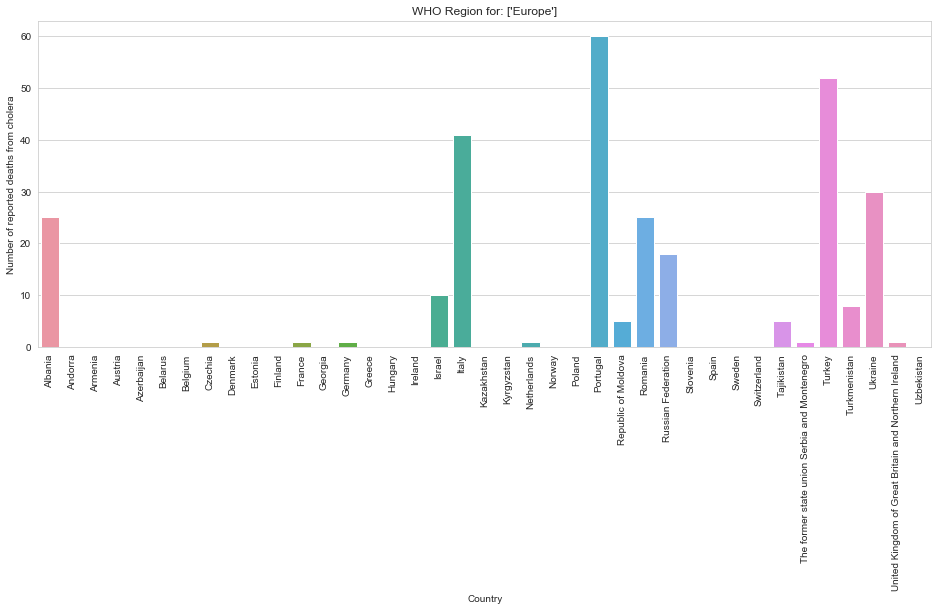

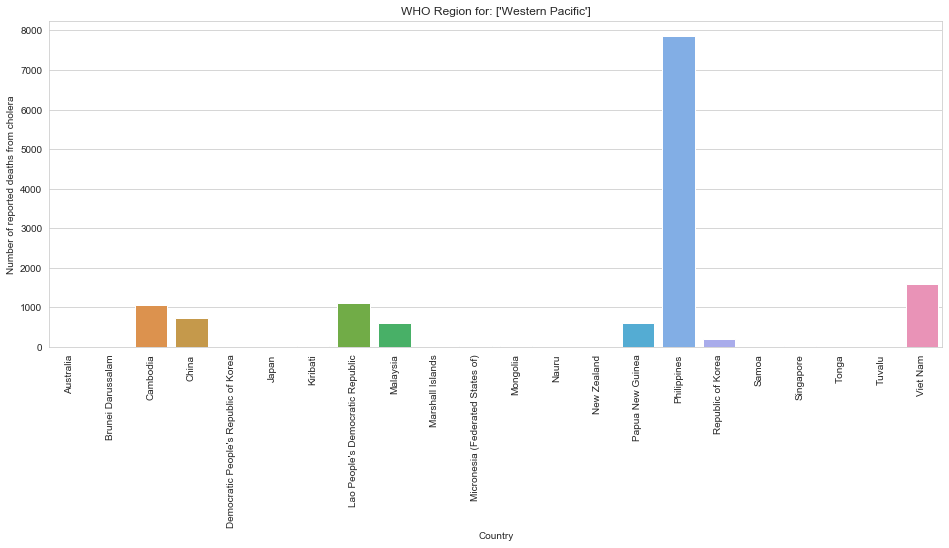

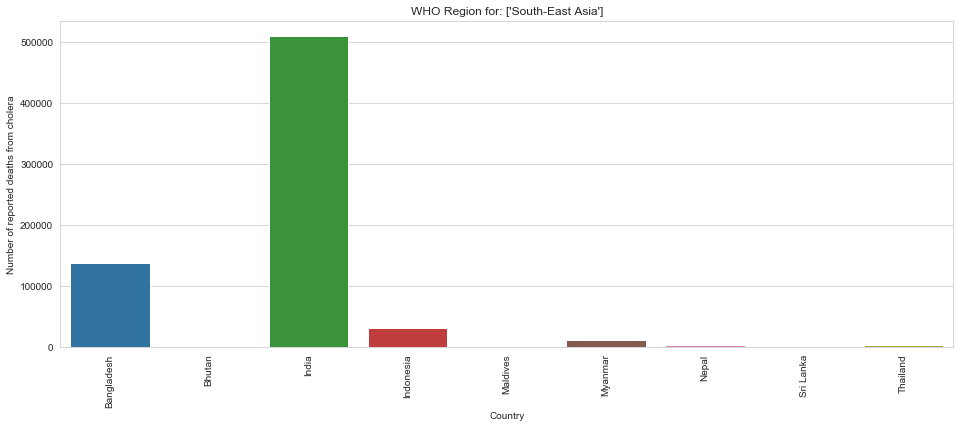

In [97]:
deathrate(eastern_maditer)
deathrate(africa)
deathrate(europe)
deathrate(western)
deathrate(south_east_asia)

In [98]:
fatality = dataset.groupby(["Country", "Year"])["Cholera case fatality rate"].max().sort_values(ascending=False).reset_index()
fatality = pd.DataFrame(fatality).head(30)

In [99]:
fatality.head(30)

,Country,Year,Cholera case fatality rate
0,Italy,1998,450.00
1,Cambodia,1956,100.00
2,Burkina Faso,1975,100.00
3,Netherlands,1976,100.00
4,Cambodia,1954,100.00
5,Burkina Faso,1970,100.00
6,Viet Nam,1953,100.00
7,Togo,1978,100.00
8,Viet Nam,1954,100.00
9,Zambia,1989,100.00


<BarContainer object of 30 artists>

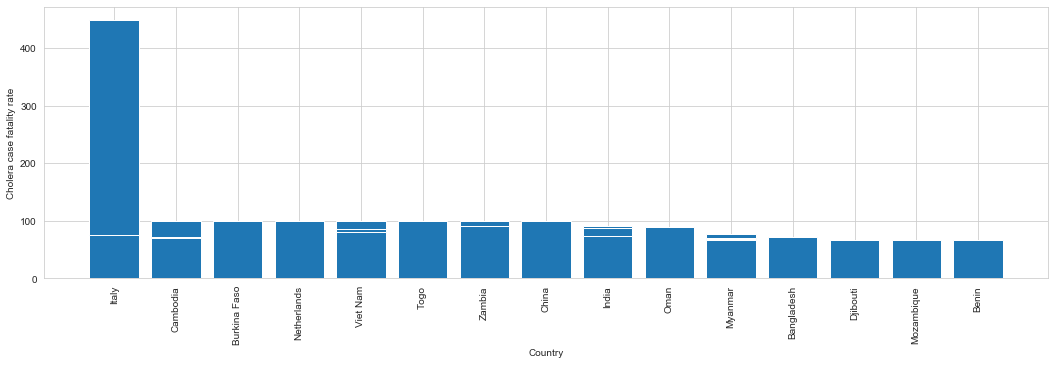

In [100]:
plt.subplots(figsize=(18,5))
plt.xticks(rotation=90)
plt.ylabel("Cholera case fatality rate")
plt.xlabel("Country")
x = fatality["Country"]
y = fatality["Cholera case fatality rate"]
plt.bar(x, y)

In [101]:
dataset.head()

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
0,Afghanistan,2016,677,5,0.70,Eastern Mediterranean
1,Afghanistan,2015,58064,8,0.01,Eastern Mediterranean
2,Afghanistan,2014,45481,4,0.00,Eastern Mediterranean
3,Afghanistan,2013,3957,14,0.35,Eastern Mediterranean
4,Afghanistan,2012,12,0,0.10,Eastern Mediterranean


In [102]:
deathRate = dataset.groupby('Country').sum().loc[:, ['Number of reported cases of cholera', 'Number of reported deaths from cholera']]

In [103]:
deathRate['Death Rate(%)'] = deathRate['Number of reported deaths from cholera'] * 100 / deathRate['Number of reported cases of cholera']
deathRate = deathRate.sort_values('Death Rate(%)', ascending=False).head(30)

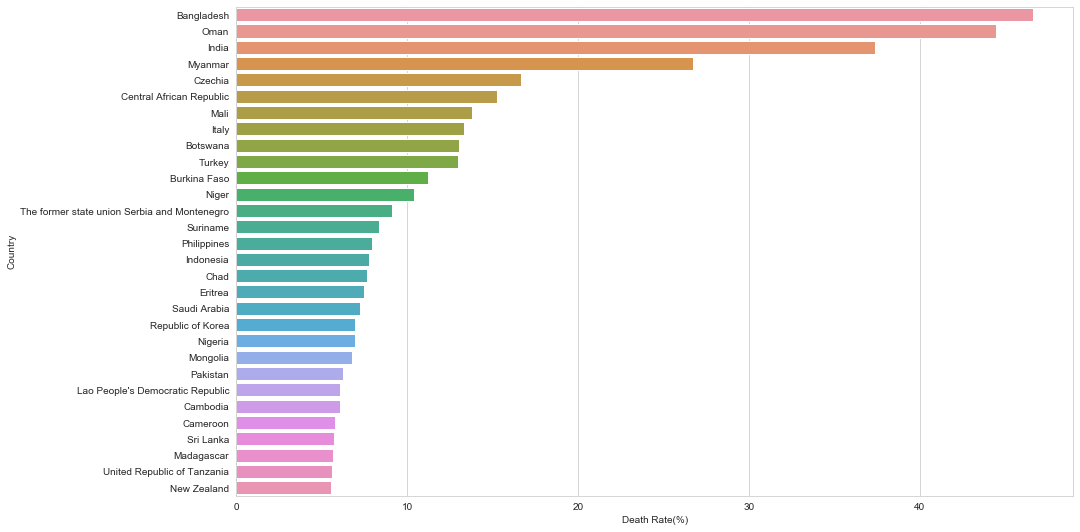

In [104]:
sns.set_style("whitegrid")
plt.subplots(figsize=(15, 9))
sns.barplot(y=deathRate.index, x=deathRate["Death Rate(%)"])